# Логистическая регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
print(sklearn.__version__)


1.3.0


# Линейная модель

Линейные модели являются одними из самых простых и интуитивно монятных моделей машинного обучения. 

Напомним основы о которых мы с Вами говорили на 1 занятии.

У нас есть множество объектов (признаков) $X$, и каждому из них мы хотим сопоставить какое-то значение $y$. 

К примеру, у нас есть набор операций по банковской карте, а мы хотели бы, понять, какие из этих операций являются мошенническими. Если вы разделите все операции на два класса и нулём обозначите законные действия, а единицей мошеннические, то у вас получится простейшая задача классификации. 

Представьте другую ситуацию: у вас есть данные о годе выпуска, технических характеристиках и марках автомобилей, по которым мы хотели бы оценить стоимость этих автомобилей на вторичном рынке. Это пример задачи регрессии.

Таким образом, задачи классификации и регрессии можно сформулировать как поиск отображения из множества объектов $X$ в множество возможных $y$.

Математически задачи можно описать так:
- для  классификации $X\rightarrow \{0,1,..., c\}$ где $0,...,c$ - номера классов;
- для регрессии $X\rightarrow \mathbb{R}$, где $\mathbb{R}$ - вещественное число.


Вся данная лекция будет посвящена самому простому такому семейству — линейным функциям вида

$$ y = f_w(x_i) = w_1 x_1 + ... + w_n x_n + w_0, $$

где $y$ или $f_w(x_i)$ – целевая переменная (target), $(x_1,...,x_n)$ – вектор, соответствующий объекту выборки (вектор признаков, мы их также называем фичами от английского features), а $w_1, ... ,w_n, w_0$  – параметры модели. Признаки ещё называют фичами (от английского features). 

Вектор $w = (w_1,...,w_n)$ часто называю (особенно в эеконометрике) вектором весов, а число $w_0$
 – свободным коэффициентом, или сдвигом (bias). В эеконометрике свободный коэффициент обозначают $\varepsilon$.
 
Более компактно линейную модель можно записать в виде:
 
 $$ f_w(x_i) = \langle x_i,w \rangle + w_0$$
 
 
 $$ \left(x_{i,1} ... x_{i,k}\right)\left( \begin{array}{c} w_{1}\\... \\ w_{k} \end{array}\right)+w_0 = 
 \left(1, x_{i,1} ... x_{i,k}\right)\left( \begin{array}{c}  w_{0}\\w_{1}\\... \\ w_{k} \end{array}\right)
 $$
 
Поскольку это сильно упрощает запись, в дальнейшем мы будем считать, что это уже сделано и зависимость имеет вид просто $f_w(x_i)=⟨x_i,w⟩$.


Теперь, когда мы выбрали семейство функций, в котором будем искать решение, задача стала существенно проще. Мы теперь ищем не какое-то абстрактное отображение, а конкретный вектор $(w_0,w_1,...,w_k)\in \mathbb R_{k+1}$.

Чтобы применять линейную модель, нужно, чтобы каждый объект уже был представлен вектором численных признаков $x_1,..., x_k$. Конечно, просто текст или граф в линейную модель не положить, придётся сначала придумать для него численные фичи. 

**Важно!** Модель называют линейной, если она является линейной по этим численным признакам.

**Следствие.** Линейные зависимости не так просты, как кажется. Пусть мы решаем задачу регрессии. Если мы подозреваем, что целевая переменная $y$ не выражается через $x1$, $x2$ как линейная функция, а зависит ещё от логарифма $x1$ и ещё как-нибудь от того, разные ли знаки у признаков, то мы можем ввести дополнительные слагаемые в нашу линейную зависимость, просто объявим эти слагаемые новыми переменными, и добавив перед ними соответствующие регрессионные коэффициенты:

$$ y =  w_1 x_1 + w_2x_2+w_3\log x_1+ w_4 \;\text{sgn}\; (x_1 x_2) + w_0 $$

и в итоге из двумерной нелинейной задачи мы получили четырёхмерную линейную регрессию - линейную в смысле весов $w_i$.

Помимо простоты, у линейных моделей есть несколько других достоинств. К примеру, мы можем достаточно легко судить, как влияют на результат те или иные признаки. Скажем, если вес $w_i$
положителен, то с ростом $i$-го признака таргет в случае регрессии будет увеличиваться, а в случае классификации наш выбор будет сдвигаться в пользу одного из классов. 

Значение весов тоже имеет прозрачную интерпретацию: чем вес $w_i$ больше, тем «важнее» $i$-й признак для итогового предсказания. То есть, если вы построили линейную модель, вы неплохо можете объяснить заказчику те или иные её результаты. 

Это качество моделей называют **интерпретируемостью**. Оно особенно ценится в индустриальных задачах, цена ошибки в которых высока. Если от работы вашей модели может зависеть жизнь человека, то очень важно понимать, как модель принимает те или иные решения и какими принципами руководствуется. При этом, не все методы машинного обучения хорошо интерпретируемы, к примеру, поведение искусственных нейронных сетей или градиентного бустинга интерпретировать довольно сложно (без понимания концепции векторов Шепли).

В то же время слепо доверять весам линейных моделей тоже не стоит по целому ряду причин:

- Линейные модели всё-таки довольно узкий класс функций, они неплохо работают для небольших датасетов и простых задач. Однако, если вы решаете линейной моделью более сложную задачу, то вам, скорее всего, придётся выдумывать дополнительные признаки, являющиеся сложными функциями от исходных. Поиск таких дополнительных признаков называется feature engineering, технически он устроен примерно так, как показано в "следствии". Вот только поиском таких искусственных фичей можно сильно увлечься, так что осмысленность интерпретации будет сильно зависеть от здравого смысла эксперта, строившего модель.

- Если между признаками есть приближённая линейная зависимость, коэффициенты в линейной модели могут совершенно потерять физический смысл (об этой проблеме и о том, как с ней бороться, мы поговорим дальше, когда будем обсуждать регуляризацию).

- Особенно осторожно стоит верить в утверждения вида «этот коэффициент маленький, значит, этот признак не важен». Во-первых, всё зависит от масштаба признака: вдруг коэффициент мал, чтобы скомпенсировать его. Во-вторых, зависимость действительно может быть слабой, но кто знает, в какой ситуации она окажется важна. 

- Конкретные значения весов могут меняться в зависимости от обучающей выборки, хотя с ростом её размера они будут потихоньку сходиться к весам «наилучшей» линейной модели, которую можно было бы построить по всем-всем-всем данным на свете.

## Mетод наименьших квадратов 

Простейшим примером постановки задачи линейной регрессии является метод наименьших квадратов (Ordinary least squares).

Пусть у нас задан датасет $(X,y)$ где: 
- $y = (y_i)_{i=1}^n \in \mathbb{R}^n$ – вектор значений целевой переменной; 
- $ X=(x_i)_{i=1}^n \in \mathbb{R}^{n\times k}, x_i \in \mathbb{R}^k$ – матрица объекты-признаки, в которой $i$-я строка – это вектор признаков $j$-го объекта выборки. 

Мы хотим моделировать зависимость $y_i$ от $x_i$ как линейную функцию со свободным членом. Общий вид такой функции из $\mathbb{R}^k$  в $\mathbb{R}$ выглядит следующим образом:

$$f_w(x_i)=⟨x_i,w_i⟩$$

### Сведение к задаче оптимизации

Мы хотим, чтобы на нашем датасете (то есть на парах $(x_i,y_i)$ из обучающей выборки) функция $f_w$ как можно лучше приближала нашу зависимость.

![lin](Pict/linear1.png)

Для того, чтобы чётко сформулировать задачу, нам осталось только одно: на математическом языке выразить желание «приблизить $f_w(x)$ к $y$». Говоря простым языком, мы должны научиться измерять качество модели и минимизировать её ошибку, как-то меняя обучаемые параметры. 

В нашем примере обучаемые параметры — это веса $w$. Функция, оценивающая то, как часто модель ошибается, традиционно называется функцией потерь, функционалом качества или просто лоссом (loss function). Важно, чтобы её было легко оптимизировать: при этом, гладкая функция потерь – это хорошо, а кусочно постоянная – просто ужасно.

Функции потерь бывают разными. От их выбора зависит то, насколько задачу в дальнейшем легко решать, и то, в каком смысле у нас получится приблизить предсказание модели к целевым значениям. Интуитивно понятно, что для нашей текущей задачи нам нужно взять вектор $y$  и вектор предсказаний модели и как-то сравнить, насколько они похожи. 

Так как эти вектора «живут» в одном векторном пространстве, расстояние между ними вполне может быть функцией потерь. Более того, положительная непрерывная функция от этого расстояния тоже подойдёт в качестве функции потерь. При этом способов задать расстояние между векторами тоже довольно много и мы о них уже говорили. 

Давайте в качестве лосса возьмём квадрат $L^2$-нормы вектора разницы предсказаний модели и $y$. 

Во-первых, как окажется, так задачу будет нетрудно решить, а во-вторых, у этого лосса есть ещё несколько дополнительных свойств:

- $L_2$-норма разницы – это евклидово расстояние $‖y−f_w(x)‖_2 =\sqrt{(y−f_w(x))} $  между вектором таргетов и вектором ответов модели, то есть мы их приближаем в смысле самого простого и понятного «расстояния».

- С точки зрения теории вероятности и мат. стата это соответствует гипотезе о том, что наши данные состоят из линейного «сигнала» и нормально распределенного «шума» (вспоминаем эонометрику - $\varepsilon$).

Так вот, наша функция потерь выглядит так ($L$ это функция потель, а $L_2$ это эвклидова норма, увы в математике слишком мало букв и так сложилось ...):

$$
L(f,X,y) = ‖y−f_w(X)‖_2^2 = ‖y − Xw)‖_2^2 = \sum_{i=1}^n(y_i - ⟨x_i, w⟩)^2
$$

Такой функционал ошибки не очень хорош для сравнения поведения моделей на выборках разного размера. Представьте, что вы хотите понять, насколько качество модели на тестовой выборке из 2500 объектов хуже, чем на обучающей из 5000 объектов. Вы измерили $L_2$-норму ошибки и получили в одном случае 300, а в другом 500. Эти числа не очень интерпретируемы. Гораздо лучше посмотреть на среднеквадратичное отклонение:

$$
L(f,X,y) = \frac{1}{n} \sum_{i=1}^n(y_i - ⟨x_i, w⟩)^2
$$

По этой метрике на тестовой выборке получаем 0.12, а на обучающей 0.1.

Функция потерь $\frac{1}{N}=\sum{i=1}^n = (y_i−⟨x_i,w⟩)^2$ называется Mean Squared Error, MSE или среднеквадратическим отклонением. Разница с L_2-нормой чисто косметическая, на алгоритм решения задачи она не влияет:
$$
MSE(f,X,y)=\frac{1}{N}‖y−Xw‖^2_2
$$

В самом широком смысле, функции работают с объектами множеств: берут какой-то входящий объект из одного множества и выдают на выходе соответствующий ему объект из другого. 

Если мы имеем дело с отображением, которое на вход принимает функции, а на выходе выдаёт число, то такое отображение называют функционалом. Если вы посмотрите на нашу функцию потерь, то увидите, что это именно функционал. 

Для каждой конкретной линейной функции, которую задают веса $w_i$, мы получаем число, которое оценивает, насколько точно эта функция приближает наши значения $y$. 

Чем меньше это число, тем точнее наше решение, значит для того, чтобы найти лучшую модель, этот функционал нам надо минимизировать по $w$:
$$ ‖y−Xw‖^2_2 \rightarrow \min_w$$
Эту задачу можно решать разными способами:
- МНК: точный аналитический метод;
- МНК: приближенный численный метод (градиентный спуск).

### Аналитический метод

Пусть $x^{(1)},...,x^{(k)}$ – столбцы матрицы X, то есть столбцы признаков. 
Тогда 
$$ X w = w_1x^{(1)}+...+w_k x^{(k)}$$ 

Теперь задачу регрессии можно сформулировать следующим образом: 

*найти линейную комбинацию столбцов $x^{(1)},...,x^{(k)}$ которая наилучшим способом приближает столбец $y$
по евклидовой норме – то есть найти проекцию вектора $y$
на подпространство, образованное векторами $x^{(1)},...,x^{(k)}$*.


Разложим $y=y_{||}+y_{\perp}$, где $y_{||}=Xw$ – проекция на линейное подпространство, а $y_{\perp}$
 – ортогональная составляющая, то есть $y_{\perp} = y−Xw \perp x^{(1)},...,x^{(k)}$. 
 
Как это можно выразить в матричном виде? Оказывается, очень просто:
$$ X^{T}(y−Xw) = 0 $$
 
В самом деле, каждый элемент столбца $X^{T}(y−X w)$ – это скалярное произведение строки $X^T$ (т.е. столбца $X$ или одного из $x(i)$) на $y−Xw$. Из уравнения $X_T(y−Xw)=0$ уже очень легко выразить $w$:
$$
w=(X^T X)^{−1}X^Ty
$$

**Важно замечание.** Может ли быть матрица $X^T X$ вырожденной матрицей? Такое может быть если ее столбцы (строки) линейно зависимы. Строки это просто - не должно быть одинаковых строк. Столбцы скорее всего нет, так как зачастую признаки могут быть приближённо линейно зависимы, особенно если их много. Тогда матрица $X^T X$
 будет близка к вырожденной, и это, как мы дальше увидим, будет вести к разным, в том числе вычислительным проблемам.
 
**Проблемы аналитического решения.** вычислительная сложность $n^2k+k^3$ (сложность перемножение $n^2k$, обращение $k^3$) это долго вычислять при большом количестве строк и признаков ...

### Приближенный численный метод

Минимизируемый функционал является гладким и выпуклым, а это значит, что можно эффективно искать точку его минимума с помощью итеративных градиентных методов.

Как известно, градиент функции в точке направлен в сторону её наискорейшего роста, а антиградиент (противоположный градиенту вектор) в сторону наискорейшего убывания. То есть имея какое-то приближение оптимального значения параметра $w$, мы можем его улучшить, посчитав градиент функции потерь в точке и немного сдвинув вектор весов в направлении антиградиента:
$$
w_j \rightarrow w_j − \alpha \frac{d}{dw_j}L(f_w,X,y)
$$
где $\alpha$ – это параметр алгоритма («темп обучения»), который контролирует величину шага в направлении антиградиента. Описанный алгоритм называется градиентным спуском.

Посмотрим, как будет выглядеть градиентный спуск для функции потерь
$$L(fw,X,y)=\frac{1}{n}||Xw−y||^2$$

Градиент квадрата евклидовой нормы ([как дифференцируются матрицы](http://www.machinelearning.ru/wiki/images/5/50/MOMO17_Seminar2.pdf)): 

$$ \nabla_w L = \frac{2}{n} X^T (Xw−y) $$
 
Следовательно, стартовав из какого-то начального приближения, мы можем итеративно уменьшать значение функции, пока не сойдёмся (по крайней мере в теории) к минимуму (вообще говоря, локальному, но в данном случае глобальному).

**Сложность.** вычислительная сложность  $n k s$, где $s$ - максимальное число итераций.

 Градиентный спуск может вычисляться полностью (с расчетом градиента по всем направлениям) или по случайно отобраным направлениям (частично), так называемый стохастический градиентный спуск.

## Регуляризация

Всегда ли решение задачи регрессии единственно? Вообще говоря, нет. Так, если в выборке два признака будут линейно зависимы (и следовательно, ранг матрицы будет меньше $k$), то гарантировано найдётся такой вектор весов $\gamma$ что $⟨\gamma,x_i⟩=0 \forall x_i$. 

В этом случае, если какой-то $w$ является решением оптимизационной задачи, то и $w+\alpha\gamma$ тоже является решением для любого $\alpha$. 

То есть решение не только не обязано быть уникальным, так ещё может быть сколь угодно большим по модулю. Это создаёт вычислительные трудности. 

Малые погрешности признаков сильно возрастают при предсказании ответа, а в градиентном спуске накапливается погрешность из-за операций со слишком большими числами.

Конечно, в жизни редко бывает так, что признаки строго линейно зависимы, а вот быть приближённо линейно зависимыми они вполне могут быть. Такая ситуация в машинном обучении называется **мультиколлинеарностью**. В этом случае у нас, всё равно, возникают проблемы, близкие к описанным выше. 

Важно ещё отметить, что в случае, когда несколько признаков линейно зависимы, веса $w_i$ при них теряют физический смысл. Может даже оказаться, что вес признака, с ростом которого таргет, казалось бы, должен увеличиваться, станет отрицательным. Это делает модель не только неточной, но и принципиально не интерпретируемой. Вообще, неадекватность знаков или величины весов – хорошее указание на мультиколлинеарность.

Для того, чтобы справиться с этой проблемой, задачу обычно регуляризуют, то есть добавляют к ней дополнительное ограничение на вектор весов.

Вместо исходной задачи теперь предлагается решить такую:

$$\min_w L(fw,X,y)= \min_w (‖Xw−y‖^2_2+\lambda‖w‖^*_*)$$

где $\lambda$ - коэффициентом регуляризации, $‖w‖^*_*$ - регуляризатор, один из двух вариантов:

$$‖w‖^2_2 = w_1^2+...+w_k^2$$

$$‖w‖^1_1 =  |w_1|+...+|w_k|$$

Коэффициент$\lambda$ является гиперпараметром модели и **достаточно сильно влияет** на качество итогового решения. Его подбирают **по логарифмической шкале** (скажем, от 0.01 до 100), используя для сравнения моделей с разными значениями $\lambda$ поверочные выборки. При этом качество модели с подобранным коэффициентом регуляризации уже проверяют на тестовой выборке, чтобы исключить переобучение. 

Отдельно надо договориться о том, что вес $w_0$, соответствующий отступу от начала координат (то есть признаку из всех единичек), мы регуляризовать не будем, потому что это не имеет смысла: если даже все значения $y$
 равномерно велики, это не должно портить качество обучения. Обычно это не отображают в формулах, но если придираться к деталям, то стоило бы написать сумму по всем весам, кроме $w_0$:
$$‖w‖^2_2 = \sum_{j=1}^k w_j^2$$

$$‖w‖^1_1 = \sum_{j=1}^k |w_j|$$

В случае $L^2$-регуляризации решение задачи изменяется не очень сильно. Например, продифференцировав новый лосс по $w$, легко получить, что «точное» решение имеет вид:

$$ w=(X^T X+\lambda I)^{−1}X^T y $$

Отметим, что за этой формулой стоит и понятная численная интуиция: раз матрица $X^T X$
 близка к вырожденной и обращать её сродни самоубийству. Мы лучше слегка исказим её добавкой $\lambda I$, которая увеличит все собственные значения на $\lambda$, отодвинув их от нуля. 
 
Конечно, аналитическое решение перестаёт быть «точным», но за счёт снижения численных проблем мы получим более качественное решение, чем при использовании «точной» формулы.

В свою очередь, градиент функции потерь

$$ L(f_w,X,y)= ‖X w−y‖^2+\lambda ‖w‖^2 $$

по весам теперь выглядит так:

$$ \nabla_ w L(f_w,X,y) = 2 X^T (Xw−y)+2\lambda w $$

Подставив этот градиент в алгоритм  градиентного спуска, мы получаем обновлённую версию приближенного алгоритма, отличающуюся от старой только наличием дополнительного слагаемого.

$L^2$ - регуляризация работает прекрасно и используется в большинстве случаев, но есть одна полезная особенность $L^1$ - регуляризации: её применение приводит к тому, что у признаков, которые не оказывают большого влияния на ответ, вес в результате оптимизации получается равным 0. 

Это позволяет удобным образом удалять признаки, слабо влияющие на таргет. Кроме того, это даёт возможность автоматически избавляться от признаков, которые участвуют в соотношениях приближённой линейной зависимости, соответственно, спасает от проблем, связанных с мультиколлинеарностью.

Не очень строгим, но довольно интуитивным образом это можно объяснить так:

1. В точке оптимума линии уровня регуляризационного члена касаются линий уровня основного лосса, потому что, во-первых, и те, и другие выпуклые, а во-вторых, если они пересекаются трансверсально, то существует более оптимальная точка:

![ris02](Pict/linear2.png)

2. Линии уровня $L^1$-нормы – это n-мерные октаэдры. Точки их касания с линиями уровня лосса, скорее всего, лежат на грани размерности, меньшей $n−1$, то есть как раз в области, где **часть координат равна нулю**:

![ris03](Pict/linear3.png)

### Покажем эффект коллинеарности коэффициентов  $L_2$ регрессии.

В данном примере используется ридж-регресссия или гребневой регрессии. Цветом обозначается характеристика веса признака в зависимости от коэффициента регуляризации.

Этот пример также показывает полезность применения ридж-регрессии к очень плохо обусловленным матрицам, например [Гильбертовым матрицам](https://ru.wikipedia.org/wiki/Матрица_Гильберта). Для таких матриц небольшое изменение целевой переменной может привести к огромным расхождениям в рассчитанных весах. В таких случаях полезно установить определенную регуляризацию (альфа), чтобы уменьшить эту вариацию (шум).

Когда альфа очень велика, эффект регуляризации доминирует над квадратом функции потерь, и коэффициенты стремятся к нулю. В конце пути, когда альфа стремится к нулю, а решение стремится к обычному методу наименьших квадратов, коэффициенты демонстрируют большие колебания. На практике необходимо настроить альфу таким образом, чтобы поддерживать баланс между ними.

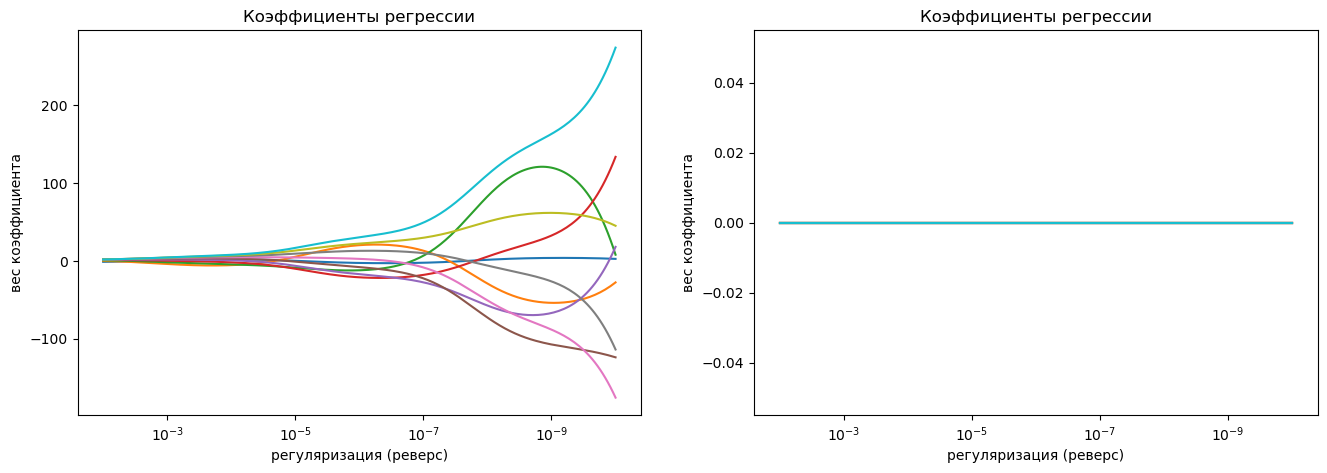

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)


n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs_f = []
coefs_t = []
for a in alphas:
    ridge_f = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge_f.fit(X, y)
    coefs_f.append(ridge_f.coef_)
    ridge_t = linear_model.Ridge(alpha=a, fit_intercept=True)
    ridge_t.fit(X, y)
    coefs_t.append(ridge_t.coef_)

plt.figure(figsize = (16,5))  
coefs = [coefs_f, coefs_t]

for i in [1,2]:
    ax = plt.subplot(1, 2, i)
    ax.plot(alphas, coefs[i-1])
    ax.set_xscale("log")
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel("регуляризация (реверс)")
    plt.ylabel("вес коэффициента")
    plt.title("Коэффициенты регрессии")
plt.show()

### Покажем эффект коллинеарности коэффициентов  $L_1$ регрессии.

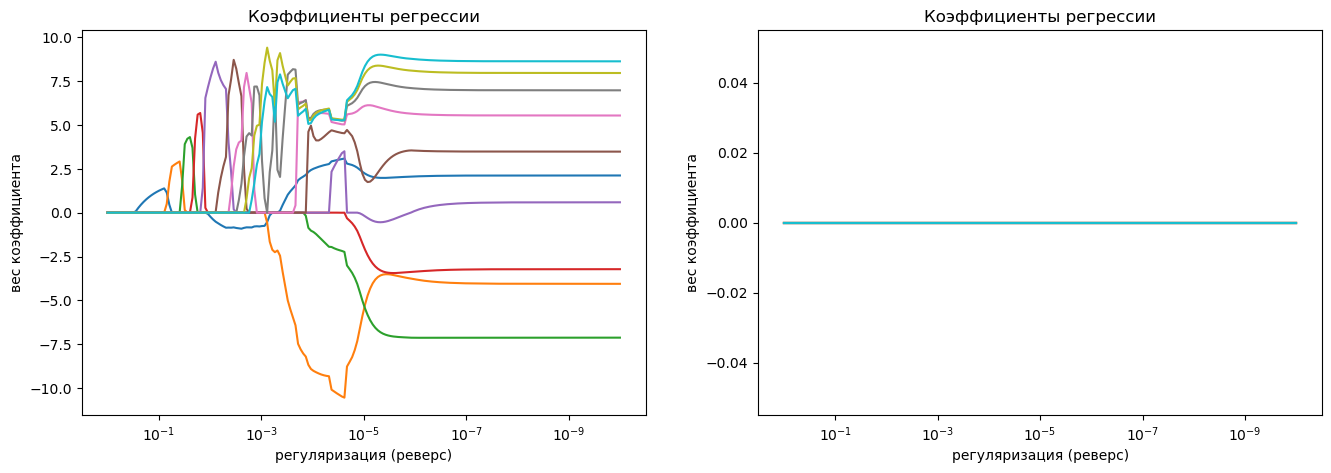

In [3]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)


n_alphas = 200
alphas = np.logspace(-10, 0, n_alphas)

coefs_f = []
coefs_t = []
for a in alphas:
    ridge_f = linear_model.Lasso(alpha=a, fit_intercept=False, max_iter=10000, tol = 0.001)
    ridge_f.fit(X, y)
    coefs_f.append(ridge_f.coef_)
    #ridge_t = linear_model.Lasso(alpha=a, fit_intercept=True)
    ridge_t.fit(X, y)
    coefs_t.append(ridge_t.coef_)

plt.figure(figsize = (16,5))  
coefs = [coefs_f, coefs_t]

for i in [1,2]:
    ax = plt.subplot(1, 2, i)
    ax.plot(alphas, coefs[i-1])
    ax.set_xscale("log")
    ax.set_xlim(ax.get_xlim()[::-1])  
    plt.xlabel("регуляризация (реверс)")
    plt.ylabel("вес коэффициента")
    plt.title("Коэффициенты регрессии")
plt.show()

# 

Основные алгоритмы применяемые в линейных регрессиях:

1. [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge) -  $L_2$ регуляризация.
2. [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso) -  $L_1$ регуляризаци.
3. [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) - $L_1$ и $L_2$ регуляризация (обычно, сложнее в настройке при незначительном эффекте).
4. [`Lars`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars) - [метод наименьших углов для отбора значимых весов](http://www.machinelearning.ru/wiki/index.php?title=LARS). Интересный факт: Lasso является частым случаем Lars. Кстати, есть довольно интересное свойство: он может эффективно работать на выборках, в которых число признаков больше числа примеров.
5. [`OrthogonalMatchingPursuit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html) - модель используется для получения регрессий на разреженных данных и удаления шума(https://en.wikipedia.org/wiki/Matching_pursuit)
6. [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) - линейная модель подобрана путем минимизации регуляризованных эмпирических потерь с помощью стохастического градиентного спуска.
